In [5]:
#importo le librerie che mi servono

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#Scarico i dati dalla dashboard di Franco Mossotto

df = pd.read_csv("Coronavirus Italia_Main Dashboard_Time series (90).csv")
df.head(10)

,Date,Daily Cases
0,"Oct 1, 2020",114
1,"Oct 2, 2020",72
2,"Oct 3, 2020",111
3,"Oct 4, 2020",151
4,"Oct 5, 2020",83
5,"Oct 6, 2020",106
6,"Oct 7, 2020",196
7,"Oct 8, 2020",248
8,"Oct 9, 2020",249
9,"Oct 10, 2020",184


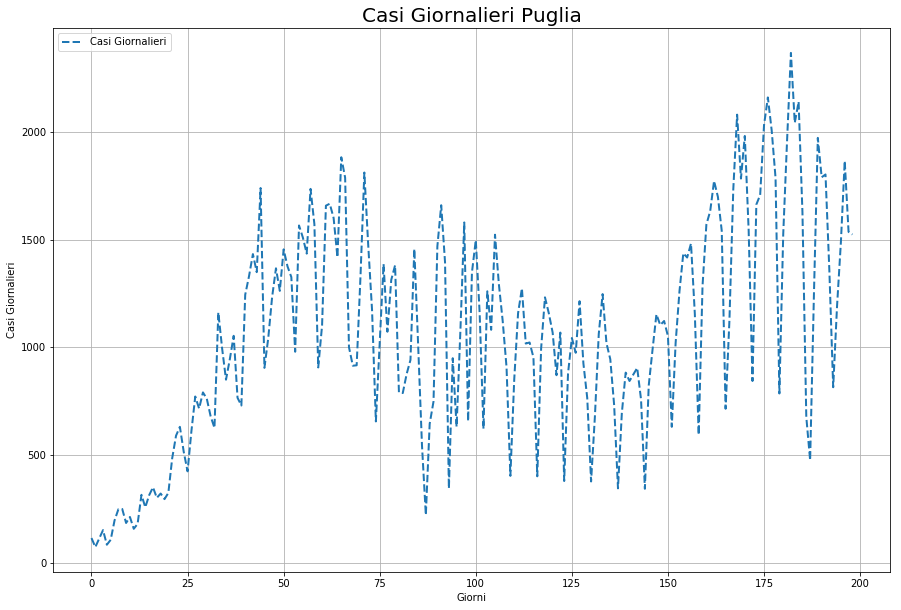

In [7]:
#Faccio una prima prova del grafico. Senza stile "ggplot", 
#senza data come valore nelle ascisse e senza media mobile bisettimanale

plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df['Daily Cases'], label='Casi Giornalieri', linewidth=2, linestyle='--')
plt.xlabel('Giorni')
plt.ylabel('Casi Giornalieri')
plt.title("Casi Giornalieri Puglia", fontsize=20)
plt.legend(loc=2)

In [8]:
#Creo la media mobile bisettimanale tramite un loop con le librerie pandas e numpy

for i in range(0,df.shape[0]-13):
    df.loc[df.index[i+13],'SMA_14'] = np.round(((df.iloc[i,1]+ df.iloc[i+1,1] +df.iloc[i+2,1]+df.iloc[i+3,1]+ df.iloc[i+4,1]+ df.iloc[i+5,1]+ df.iloc[i+6,1]+ df.iloc[i+7,1]+ df.iloc[i+8,1]+ df.iloc[i+9,1]+ df.iloc[i+10,1]+ df.iloc[i+11,1]+ df.iloc[i+12,1]+ df.iloc[i+13,1])/14),1)

In [9]:
df['pandas_SMA_14'] = df.iloc[:,1].rolling(window=14).mean()

C:\Users\giuse\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\giuse\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\giuse\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


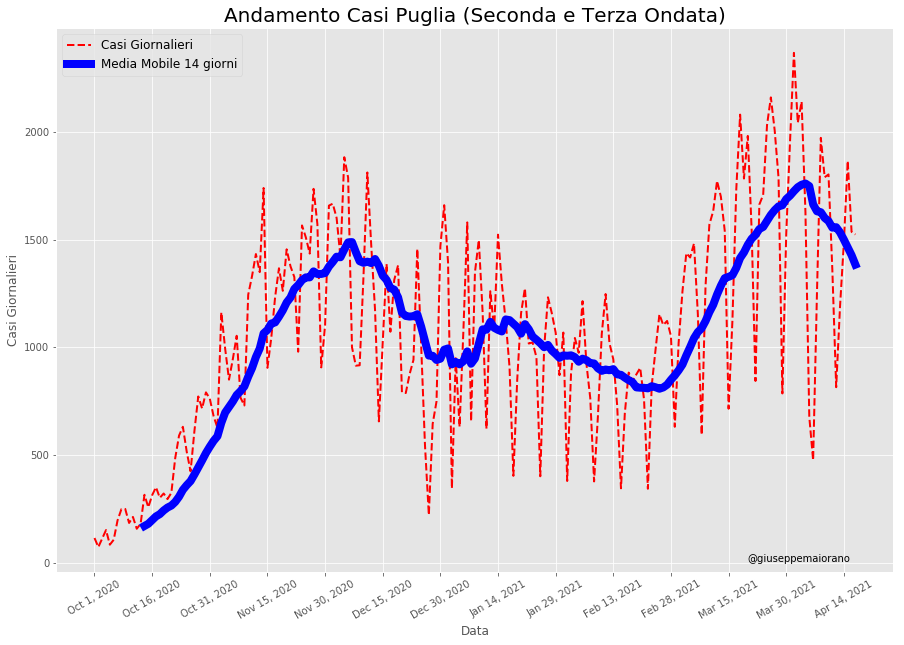

In [16]:
#Creo il grafico con la media mobile inserendo lo stile fornito da matplotlib "ggplot" e
#la data come valore delle ascisse 

plt.figure(figsize=[15,10])
plt.grid(True)
plt.style.use("ggplot")
plt.plot(df['Date'], df['Daily Cases'],label='Casi Giornalieri', linewidth=2, linestyle='--', color='red')
plt.plot(df['SMA_14'],label='Media Mobile 14 giorni', linewidth=8, color='blue')
plt.xlabel('Data', fontsize=12)
plt.xticks([0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195], rotation=30)
plt.ylabel('Casi Giornalieri', fontsize=12)
plt.text(170, 1, "@giuseppemaiorano")
plt.title("Andamento Casi Puglia (Seconda e Terza Ondata)", fontsize=20)
plt.legend(loc=2, fontsize=12)

In [12]:
#Faccio la stessa cosa ma con la media mobile a 16 giorni. Come potete notare il risultato non è soddisfacente
#Perché i casi confermati da coronavirus hanno un ciclo settimanale e non da 8 giorni


for i in range(0,df.shape[0]-15):
    df.loc[df.index[i+15],'SMA_16'] = np.round(((df.iloc[i,1]+ df.iloc[i+1,1] +df.iloc[i+2,1]+df.iloc[i+3,1]+ df.iloc[i+4,1]+ df.iloc[i+5,1]+ df.iloc[i+6,1]+ df.iloc[i+7,1]+ df.iloc[i+8,1]+ df.iloc[i+9,1]+ df.iloc[i+10,1]+ df.iloc[i+11,1]+ df.iloc[i+12,1]+ df.iloc[i+13,1]+ df.iloc[i+14,1]+ df.iloc[i+15,1])/16),1)

In [13]:
df['pandas_SMA_16'] = df.iloc[:,1].rolling(window=16).mean()

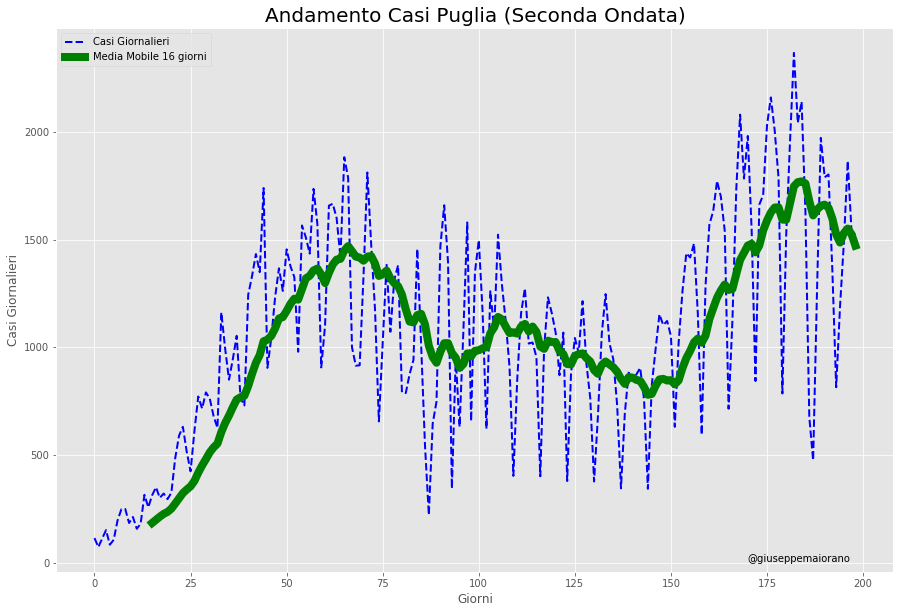

In [17]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df['Daily Cases'],label='Casi Giornalieri', linewidth=2, linestyle='--', color='blue')
plt.plot(df['SMA_16'],label='Media Mobile 16 giorni', linewidth=8, color='green')
plt.xlabel('Giorni')
plt.ylabel('Casi Giornalieri')
plt.title("Andamento Casi Puglia (Seconda Ondata)", fontsize=20)
plt.text(170, 1, "@giuseppemaiorano")
plt.legend(loc=2)